# BTC Price Prediction Project

In this project, I will:

1. Retrieve the **historical data** of Bitcoin (BTC) using the **Binance API**.


3. Perform **data visualizations** to analyze trends and patterns in BTC prices.
4. Use three predictive models to forecast BTC prices for a **week** (based on daily data):
   - **ARIMA (AutoRegressive Integrated Moving Average)**
   - **SARIMA (Seasonal AutoRegressive Integrated Moving Average)**
   - **LSTM (Long Short-Term Memory)**

This project aims to combine traditional statistical approaches and deep learning techniques to deliver accurate and insightful predictions for BTC's future prices.


## **AUTHOR LINKS:**
1. Kaggle **:** https://www.kaggle.com/hasaankhan175

3. Linkedin **:** https://www.linkedin.com/in/hasaan-khan-422249289
4. github **:**  https://github.com/hasaankhan175

5. Email: hasaankhan175@gmail.com

Now you have to download this library:

pip install python-binance pandas numpy matplotlib plotly seaborn


In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from binance.client import Client


In [3]:
# Initialize Binance Client
api_key = 'Enter_Your_Binance_API_Here'
client = Client(api_key)


# Fetch historical data for BTC/USDT (Daily Interval)
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1DAY
start_date = '1 Jan, 2020'  # Adjust as needed
klines = client.get_historical_klines(symbol, interval, start_date)

# Process the data into a DataFrame
columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 
           'Close time', 'Quote asset volume', 'Number of trades', 
           'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
btc_data = pd.DataFrame(klines, columns=columns)

# Convert timestamps to datetime
btc_data['Open time'] = pd.to_datetime(btc_data['Open time'], unit='ms')
btc_data['Close time'] = pd.to_datetime(btc_data['Close time'], unit='ms')

# Drop unnecessary columns
btc_data = btc_data[['Open time', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Convert data to numeric types
btc_data[['Open', 'High', 'Low', 'Close', 'Volume']] = btc_data[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric)

# Display the data(Only 5 rows)
print(btc_data.head(5))


   Open time     Open    High      Low    Close        Volume
0 2020-01-01  7195.24  7255.0  7175.15  7200.85  16792.388165
1 2020-01-02  7200.77  7212.5  6924.74  6965.71  31951.483932
2 2020-01-03  6965.49  7405.0  6871.04  7344.96  68428.500451
3 2020-01-04  7345.00  7404.0  7272.21  7354.11  29987.974977
4 2020-01-05  7354.19  7495.0  7318.00  7358.75  38331.085604


In [4]:
print(f'The Total Number of Rows in the Data is {len(btc_data)}')

The Total Number of Rows in the Data is 1826


# Seasonal Decomposition and Its Components

## What is Seasonal Decomposition?

Seasonal decomposition is a statistical technique used to separate a time series into its fundamental components. This helps in understanding the underlying patterns, trends, and irregularities in the data. It is particularly useful for time-series forecasting and analysis.

The time series is typically decomposed into the following components:

1. **Trend**
2. **Seasonal**
3. **Residual**

Decomposition can be **additive** (if the components combine linearly) or **multiplicative** (if the components interact proportionally).

---

## Components of Seasonal Decomposition

### 1. Trend
The **trend** represents the long-term direction or movement in the data. It shows whether the data is increasing, decreasing, or staying constant over time.

- **Example**: In a stock price dataset, the trend might indicate a gradual increase in prices over months or years.

- **Characteristics**:
  - Captures the overall trajectory.
  - Can be linear or nonlinear.

---

### 2. Seasonal
The **seasonal** component reflects repeating patterns or cycles at regular intervals.

- **Example**: Increased retail sales during holiday seasons or higher electricity usage in summer months.

- **Characteristics**:
  - Periodic and consistent in nature.
  - Helps identify cycles like daily, weekly, monthly, or yearly patterns.

---

### 3. Residual
The **residual** (or noise) component contains the random variation left after removing the trend and seasonality. It represents unexplained fluctuations in the data.

- **Example**: Sudden spikes or drops in stock prices due to unpredictable events.

- **Characteristics**:
  - Irregular and random.
  - Represents the "error" or "noise" in the time series.


---

## Applications of Seasonal Decomposition
- Time-series forecasting.
- Identifying trends for business decision-making.
- Understanding cyclic behaviors in data like sales, temperature, and stock prices.
- Noise removal for clearer patterns.

---

## Example Visualization
A seasonal decomposition would typically result in a plot with the following subplots:
1. **Observed**: Original time series data.
2. **Trend**: The overall direction of the data.
3. **Seasonal**: Cyclical patterns.
4. **Residual**: Random noise or variations.

This breakdown provides valuable insights for advanced analysis and forecasting tasks.

---

Let me know if you'd like to include a code example or additional details!


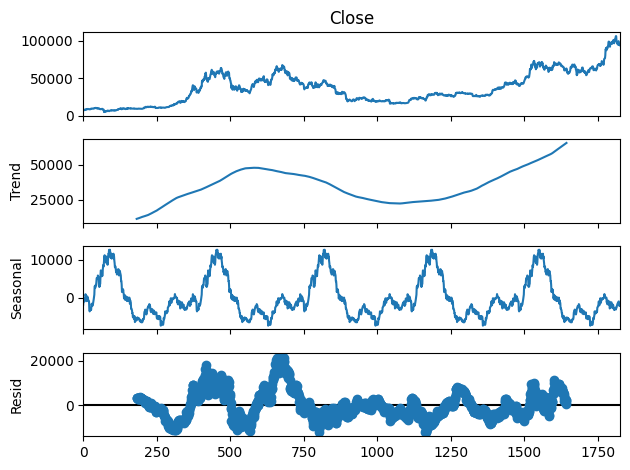

In [5]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Use the 'Close' price as the time series for decomposition
btc_series = btc_data['Close']

# Perform Seasonal Decomposition (Additive Model)
result = seasonal_decompose(btc_series, model='additive', period=365)  # Adjust `period` based on data frequency

# Plot the decomposition results
result.plot()
plt.tight_layout()
plt.show()

In [6]:
BTC_plot = px.line(
    btc_data,
    x='Open time',
    y='Close',
    title='BTC Close Price Over Time',
    labels={'Open time': 'Date', 'Close': 'Close Price (USD)'},
    template='plotly_dark'
)

# Update layout for better visualization
BTC_plot.update_layout(
    xaxis_title='Date',
    yaxis_title='Close Price (USD)',
    font=dict(size=14),
    hovermode='x unified'
)

# Display the plot
BTC_plot.show()

As we can see that 2021 is supportive for BTC. But what happened that period of year:

# The Crypto Market in 2021: A Supportive Year for Bitcoin

The year 2021 was monumental for the cryptocurrency market, with Bitcoin (BTC) reaching unprecedented levels and gaining widespread acceptance. Here’s an overview of the key events and developments that made 2021 a supportive year for BTC:

---

## 1. **Institutional Adoption**
- Major companies and institutions embraced Bitcoin, boosting its credibility as a legitimate asset class.
- **Tesla** announced a $1.5 billion investment in Bitcoin and briefly accepted it as payment for electric vehicles.
- **MicroStrategy**, led by Michael Saylor, significantly increased its Bitcoin holdings, setting an example for corporate adoption.
- Financial giants like **Fidelity**, **BlackRock**, and **Morgan Stanley** explored Bitcoin-related services and funds.

---

## 2. **Record-High Prices**
- Bitcoin hit an all-time high of nearly **$69,000** in November 2021, driven by:
  - Institutional demand.
  - Retail investor enthusiasm.
  - The broader market's bull run.

---

## 3. **Regulatory Developments**
- Governments worldwide began to establish clearer regulations for cryptocurrencies, providing legitimacy to the market.
- The U.S. approved its first **Bitcoin Futures ETF** (ProShares), allowing investors to gain exposure to Bitcoin through regulated financial products.

---

## 4. **Increased Adoption as Legal Tender**
- El Salvador became the **first country to adopt Bitcoin as legal tender** in September 2021.
  - This move encouraged wider adoption in emerging markets.
  - The government introduced the **Chivo Wallet** and incentives like $30 in free BTC for citizens who used it.

---

## 5. **Institutional and Retail FOMO**
- The fear of missing out (FOMO) drove both retail and institutional investors to enter the Bitcoin market.
- Mainstream media coverage and celebrity endorsements (e.g., Elon Musk and Jack Dorsey) fueled interest in Bitcoin.

---

## 6. **Global Macroeconomic Factors**
- The COVID-19 pandemic led to unprecedented monetary policy actions, such as:
  - Low-interest rates.
  - Increased money printing (quantitative easing).
  - Rising inflation concerns.
- Bitcoin was perceived as a **hedge against inflation**, driving its demand as "digital gold."

---

## 7. **Technological Advancements**
- The **Taproot Upgrade** in November 2021 improved Bitcoin's efficiency, privacy, and scalability.
- Lightning Network adoption grew, enabling faster and cheaper Bitcoin transactions.

---

## 8. **Supportive Market Trends**
- The growth of **DeFi** (Decentralized Finance) and **NFTs** (Non-Fungible Tokens) expanded the cryptocurrency ecosystem.
- Increased trading volumes on major exchanges like Binance, Coinbase, and Kraken highlighted the growing interest in cryptocurrencies.

---

## 9. **Bitcoin Mining Developments**
- The **China mining ban** in mid-2021 led to a temporary drop in Bitcoin’s hash rate.
- However, the mining industry quickly recovered as miners relocated to countries with cheaper and more sustainable energy sources, such as the United States and Kazakhstan.

---

## Conclusion
The year 2021 was a landmark year for Bitcoin, driven by institutional adoption, regulatory clarity, and global macroeconomic conditions. These factors reinforced Bitcoin's status as a store of value and a hedge against inflation, ensuring its continued dominance in the cryptocurrency market.



# The Crypto Market in 2024: A Bull Run After 4 Years

After a prolonged bear market and recovery phases, 2024 has emerged as a pivotal year for Bitcoin (BTC) and the broader cryptocurrency market. Several key events and factors have contributed to the renewed bull run, marking a resurgence in interest and value for digital assets.

---

## 1. **Bitcoin Halving Event**
- The **Bitcoin halving event** in April 2024 reduced the block reward from 6.25 BTC to **3.125 BTC**, cutting the supply of newly mined Bitcoin in half.
- Historically, halving events lead to increased scarcity and bullish price action due to the reduced supply and continued demand.
- Previous halvings (2012, 2016, and 2020) were followed by significant bull runs within a year of the event.

---

## 2. **Institutional Accumulation**
- Institutional investors have steadily accumulated Bitcoin since the late 2022 bear market, positioning themselves for the anticipated post-halving rally.
- Major financial institutions, including **BlackRock** and **Fidelity**, have launched spot Bitcoin ETFs in multiple regions, driving demand from retail and institutional clients.
- Hedge funds and asset managers have highlighted Bitcoin as a hedge against economic uncertainty and inflation.

---

## 3. **Global Economic Factors**
- **High Inflation Rates**: Persistent inflation in major economies has driven investors toward Bitcoin as a hedge against fiat currency devaluation.
- **Recession Fears**: Concerns over global economic slowdown and unstable stock markets have led to increased demand for alternative assets like Bitcoin.
- **Weaker USD**: A declining US Dollar Index (DXY) has supported the narrative of Bitcoin as a "safe haven" asset.

---

## 4. **Regulatory Clarity**
- Regulatory frameworks for cryptocurrencies have become more defined in 2024, especially in the United States and Europe.
- The approval of multiple **spot Bitcoin ETFs** has provided retail and institutional investors with easy access to Bitcoin in regulated markets.
- Countries like the UAE and Hong Kong have established crypto-friendly policies, attracting businesses and boosting global adoption.

---

## 5. **Technological and Ecosystem Growth**
- Bitcoin's **Lightning Network** adoption has surged, enabling faster and cheaper transactions, which has expanded Bitcoin's utility for micropayments and remittances.
- Upgrades to Bitcoin’s core protocol have improved security, scalability, and privacy features, increasing investor confidence.

---

## 6. **Global Adoption**
- Governments in developing nations continue to adopt Bitcoin for economic resilience:
  - **El Salvador's Bitcoin success story** inspired other countries to consider integrating Bitcoin into their economies.
  - African nations have shown growing interest in Bitcoin for cross-border payments and financial inclusion.
- Global merchant adoption has expanded, with major brands now accepting Bitcoin as payment.

---

## 7. **Renewed Retail Interest**
- The 2024 bull run has reignited retail FOMO (Fear of Missing Out), with Bitcoin breaking key psychological price levels (e.g., $100,000).
- Social media campaigns, influencer endorsements, and the growing popularity of crypto-related content have driven a new wave of retail investors into the market.

---

## 8. **DeFi and Web3 Innovations**
- The growth of **Decentralized Finance (DeFi)** and **Web3** applications has brought renewed interest to the cryptocurrency ecosystem.
- Bitcoin has begun integrating with DeFi through tokenized BTC on other blockchains, increasing its utility and demand.

---

## 9. **Bitcoin Mining Resilience**
- Bitcoin mining has become more efficient and sustainable in 2024:
  - Mining operations have shifted to renewable energy sources, reducing environmental concerns.
  - The global hash rate reached an all-time high, signaling strong miner confidence and network security.

---

## Conclusion
The 2024 Bitcoin bull run is fueled by a combination of the halving event, institutional adoption, regulatory clarity, and global macroeconomic conditions. These factors, combined with technological advancements and ecosystem growth, have positioned Bitcoin for a historic rally, solidifying its role as digital gold and a cornerstone of the global financial system.



# **MODELLING:**

# ARIMA for Cryptocurrency Forecasting

## What is ARIMA?

**ARIMA** (AutoRegressive Integrated Moving Average) is a widely used statistical model for time series forecasting. It is particularly useful for predicting future values in datasets where past values have a correlation with future values. ARIMA models are composed of three main components:

- **AR (AutoRegressive)**: This part of the model represents the relationship between an observation and several lagged observations (previous time steps).
- **I (Integrated)**: This component involves differencing the raw observations to make the time series stationary, i.e., removing trends or seasonality.
- **MA (Moving Average)**: This part models the relationship between an observation and the residual error from a moving average model applied to lagged observations.

ARIMA is used primarily for univariate time series forecasting, where the goal is to predict future values based on historical data. The key assumption is that the future values of the time series are dependent on its past values.

### ARIMA Model Components:
1. **AR(p)**: The number of lagged observations (p) used in the model. This represents how much influence previous observations have on the future value.
2. **I(d)**: The number of differencing operations (d) needed to make the time series stationary.
3. **MA(q)**: The number of lagged forecast errors (q) to be included in the model.

---

## How Can ARIMA Be Used for Cryptocurrency Forecasting?

Cryptocurrency markets, such as Bitcoin, have complex and volatile price behaviors. Despite this, historical data can still offer valuable insights into future price movements. ARIMA models can be applied to cryptocurrency data for price prediction by analyzing the relationship between past price movements and future trends.

Here’s how ARIMA can be applied to predict the price of a cryptocurrency like Bitcoin:

### 1. **Stationarity**:
   - For ARIMA to be effective, the data must be **stationary**, meaning that its statistical properties (mean, variance) do not change over time.
   - If the time series data exhibits trends or seasonality, it must be differenced to remove these components.

### 2. **Model Building**:
   - **Order Selection**: The ARIMA model requires three parameters: p (AR), d (I), and q (MA). The optimal values for these parameters can be determined through statistical tests, such as:
     - **ACF (AutoCorrelation Function)**: Helps in selecting the MA term.
     - **PACF (Partial AutoCorrelation Function)**: Helps in selecting the AR term.
     - **ADF Test**: To check for stationarity and the need for differencing (d).
   - **Model Fitting**: Once the parameters are selected, the ARIMA model is fitted to the historical price data.

### 3. **Forecasting**:
   - Once the model is trained, it can be used to predict future prices of the cryptocurrency.
   - The model will generate forecast values based on historical patterns, helping to anticipate the price in the near future.

### 4. **Evaluation**:
   - The model’s accuracy can be evaluated by comparing the predicted values against actual data in a **testing set**.
   - Common evaluation metrics include Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

---


# ARIMA Model ke Components

ARIMA (AutoRegressive Integrated Moving Average) model ke teen main components hain: AutoRegressive (AR), Integrated (I), aur Moving Average (MA). In components ki tafsilat yeh hain:

## 1. AutoRegressive (AR)

- **Wazahat**: AR component lagged observations ko istemal karta hai. Iska matlab hai ke current value (yani aaj ka data point) ka taluq peechle values (lagged values) se hota hai.
- **Formula**: AR model ko is formula se samjha ja sakta hai:
  
  \[
  Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} + \epsilon_t
  \]

  Yahan, YtY_t current observation hai, cc constant hai, ϕ\phi coefficients hain, aur ϵt\epsilon_t error term hai.
- **Example**: Agar aap ka kehna hai ke aaj ka temperature kal ke temperature par depend karta hai, toh ye AR component hai.

## 2. Integrated (I)

- **Wazahat**: Integrated component ka maqsad time series ko stationary banana hai. Stationary ka matlab hai ke series ki statistical properties (jese mean aur variance) waqt ke sath nahi badalte.
- **Differencing**: Is component mein hum data ka difference nikalte hain (jese \(Y_t - Y_{t-1}\)), taake trend aur seasonality ko hata sakein. Agar series stationary nahi hai, toh aapko multiple differencing karni par sakti hai.
- **Example**: Agar aap dekhein ke har saal ka temperature barhta ja raha hai, toh aap pehle aur doosre saal ka difference nikal kar dekhenge ke kya series stationary hui ya nahi.

## 3. Moving Average (MA)

- **Wazahat**: MA component previous error terms ko istemal karta hai. Iska matlab hai ke current observation ka taluq peechle errors se hota hai.
- **Formula**: MA model ko is formula se samjha ja sakta hai:

  \[
  Y_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q} + \epsilon_t
  \]

  Yahan, \(\mu\) mean hai, \(\theta\) coefficients hain, aur \(\epsilon\) error terms hain.
- **Example**: Agar aaj ka temperature kal ke temperature ki galtiyon par depend karta hai, toh ye MA component hai.

## ARIMA Model ki Tarkeeb

ARIMA model in teen components ko mila kar banta hai:

- AR part lagged observations se current value ka taluq banaata hai.
- I part data ko stationary banata hai.
- MA part previous errors ko current value se relate karta hai.

Is tarah, ARIMA model time series data ko analyze karne aur future predictions karne ke liye ek powerful tool hai.

ADF Statistic: -0.5670822563032288
p-value: 0.8782479729985622


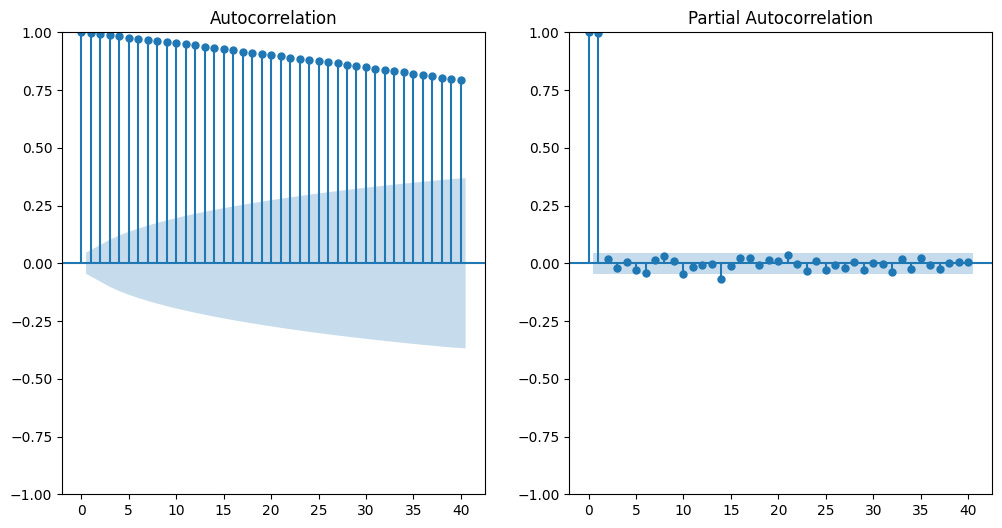

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Assuming 'btc_prices' is a pandas series with the 'Close' prices

# Step 1: Check stationarity using ADF test
adf_result = adfuller(btc_data['Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# If the p-value is above 0.05, we may need differencing (d=1)

# Step 2: Plot ACF and PACF to determine p and q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(btc_data['Close'], lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(btc_data['Close'], lags=40, ax=plt.gca())
plt.show()


In [8]:
btc_data.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
# ARIMA/SARIMA: Splitting the data into training and testing sets
# We will use the 'Close' price for both ARIMA and SARIMA models

# Convert the 'Open time' to be the index for time series analysis
btc_data.set_index('Open time', inplace=True)

# We will use 80% of the data for training and 20% for testing
train_size = int(len(btc_data) * 0.8)
train, test = btc_data['Close'][:train_size], btc_data['Close'][train_size:]

print(f"Training Data: {len(train)} samples")
print(f"Testing Data: {len(test)} samples")


Training Data: 1460 samples
Testing Data: 366 samples


In [15]:
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_squared_error

# Fit ARIMA model with pdq=(2, 1, 2)
pdq = (2, 1, 2)
model = ARIMA(btc_data['Close'], order=pdq)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the next 30 days
forecast_index = pd.date_range(start=btc_data.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Create the Plotly plot
fig = go.Figure()

# Add trace for training data (existing data)
fig.add_trace(go.Scatter(x=btc_data.index, y=btc_data['Close'], mode='lines', name='Historical Data'))

# Add trace for forecasted data (next 30 days)
fig.add_trace(go.Scatter(x=forecast_index, y=forecast, mode='lines', name='Forecasted Data', line=dict(color='orange')))

# Update layout for the plot
fig.update_layout(
    title='Bitcoin Price Forecast for the Next 30 Days',
    xaxis_title='Date',
    yaxis_title='Close Price (USD)',
    legend_title='Data Type',
    template='plotly_dark'
)

# Show the plot
fig.show()

# Optionally, print the forecasted values for the next 30 days
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecasted Price': forecast})
print(forecast_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1826
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -15703.371
Date:                Mon, 30 Dec 2024   AIC                          31416.742
Time:                        19:48:43   BIC                          31444.289
Sample:                    01-01-2020   HQIC                         31426.904
                         - 12-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5823      0.310      1.876      0.061      -0.026       1.190
ar.L2          0.3748      0.312      1.203      0.229      -0.236       0.985
ma.L1         -0.6194      0.316     -1.958      0.0

                 Date  Forecasted Price
2024-12-31 2024-12-31      94287.540902
2025-01-01 2025-01-01      94317.302370
2025-01-02 2025-01-02      94315.702630
2025-01-03 2025-01-03      94325.924587
2025-01-04 2025-01-04      94331.276963
2025-01-05 2025-01-05      94338.224257
2025-01-06 2025-01-06      94344.275290
2025-01-07 2025-01-07      94350.402173
2025-01-08 2025-01-08      94356.237337
2025-01-09 2025-01-09      94361.931069
2025-01-10 2025-01-10      94367.433126
2025-01-11 2025-01-11      94372.770573
2025-01-12 2025-01-12      94377.940341
2025-01-13 2025-01-13      94382.950786
2025-01-14 2025-01-14      94387.805623
2025-01-15 2025-01-15      94392.510147
2025-01-16 2025-01-16      94397.068834
2025-01-17 2025-01-17      94401.486272
2025-01-18 2025-01-18      94405.766812
2025-01-19 2025-01-19      94409.914707
2025-01-20 2025-01-20      94413.934063
2025-01-21 2025-01-21      94417.828866
2025-01-22 2025-01-22      94421.602973
2025-01-23 2025-01-23      94425.260125


# What is SARIMA and How Can It Be Used for Crypto

## Introduction to SARIMA

SARIMA (Seasonal AutoRegressive Integrated Moving Average) is an extension of the ARIMA (AutoRegressive Integrated Moving Average) model. While ARIMA is widely used for time series forecasting, SARIMA incorporates **seasonality** into the model, making it a better fit for time series data that exhibits seasonal patterns or cycles.

In the context of cryptocurrency, SARIMA can be useful for predicting the price of assets like Bitcoin (BTC), as cryptocurrency markets often exhibit seasonal trends, especially around major events, holidays, or specific trading patterns.

## Components of SARIMA Model

SARIMA extends ARIMA by adding seasonal components. The SARIMA model is denoted as **(p, d, q)(P, D, Q, S)** where:

1. **(p, d, q)**: These represent the same components as in ARIMA:
   - **p**: The number of lag observations in the autoregressive part (AR).
   - **d**: The number of times the series is differenced to make it stationary.
   - **q**: The number of lagged forecast errors in the moving average part (MA).

2. **(P, D, Q, S)**: These components account for the seasonal effects:
   - **P**: The number of seasonal autoregressive terms (Seasonal AR).
   - **D**: The number of seasonal differences required to make the series stationary.
   - **Q**: The number of seasonal moving average terms (Seasonal MA).
   - **S**: The length of the seasonal cycle (for example, 12 for monthly data with yearly seasonality or 7 for daily data with weekly seasonality).

### How SARIMA Works

SARIMA improves on ARIMA by adding the ability to model **seasonal effects**. While ARIMA models capture general trends and relationships within the time series, SARIMA models incorporate **repeating patterns** that are periodic in nature (e.g., weekly, monthly, or yearly).

### How SARIMA Can Be Used for Crypto Forecasting

Cryptocurrency markets often show recurring trends and patterns, which makes SARIMA a good fit for price prediction. For example, Bitcoin may experience significant price increases during certain months, around specific events like **halving events**, **major updates**, or **global economic news**. These patterns can be modeled using SARIMA for more accurate predictions.

### Use Case: Predicting Bitcoin Prices with SARIMA

To forecast the price of Bitcoin (BTC), SARIMA can be applied to the historical daily price data of BTC to model seasonal fluctuations. By setting **p**, **d**, **q**, **P**, **D**, **Q**, and **S** parameters, the SARIMA model can help predict future price movements based on both the **trend** and **seasonal** behavior of Bitcoin prices.


In [ ]:
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Assuming btc_data has already been loaded and 'Open time' is set as index

# SARIMA model parameters
p, d, q = 2, 1, 2  # Non-seasonal ARIMA components
P, D, Q, m = 1, 1, 1, 365  # Seasonal components (adjusted for daily data with yearly seasonality)

# Fit SARIMA model
model = SARIMAX(btc_data['Close'], order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()

# Forecast the next 30 days (adjust as needed)
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=btc_data.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_values = forecast.predicted_mean

# Create plotly plot for actual data and forecasted values
fig = go.Figure()

# Plot actual data
fig.add_trace(go.Scatter(x=btc_data.index, y=btc_data['Close'], mode='lines', name='Actual'))

# Plot forecasted data
fig.add_trace(go.Scatter(x=forecast_index, y=forecast_values, mode='lines', name='Forecast', line=dict(dash='dot')))

# Add title and labels
fig.update_layout(
    title='BTC Close Price and SARIMA Forecast',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    template='plotly_dark'
)

fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



# Long Short-Term Memory (LSTM) Networks

Long Short-Term Memory (LSTM) networks are a type of Recurrent Neural Network (RNN) that are designed to learn and remember long-term dependencies in sequential data. Unlike traditional RNNs, LSTMs are capable of addressing the vanishing gradient problem, which makes them highly effective for tasks such as time series forecasting, natural language processing, and speech recognition.

## Components of LSTM

An LSTM cell consists of three main gates that control the flow of information:

### 1. Forget Gate
The forget gate determines which information from the previous state should be discarded. It uses a sigmoid activation function to scale values between 0 (forget) and 1 (keep).

**Mathematical Representation:**
\[ f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) \]

### 2. Input Gate
The input gate decides which new information should be stored in the cell state. It has two parts:
- **Sigmoid layer:** Decides which values to update.
- **Tanh layer:** Creates candidate values for updating the state.

**Mathematical Representation:**
\[ i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) \]
\[ \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C) \]

### 3. Cell State
The cell state is the memory of the network. It gets updated based on the forget and input gates.

**Mathematical Representation:**
\[ C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t \]

### 4. Output Gate
The output gate determines the output of the current LSTM cell. It uses the updated cell state and the previous hidden state to calculate the output.

**Mathematical Representation:**
\[ o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) \]
\[ h_t = o_t \cdot \tanh(C_t) \]

## Sequences and Why They Are Important

### What Are Sequences?
A sequence is an ordered collection of data points or observations. In the context of machine learning, sequences are often time-dependent data where the order of elements matters. Examples include:
- Time series data (e.g., stock prices, weather data)
- Text (e.g., sentences, words)
- Audio (e.g., speech recognition)
- Video frames

### Why Do We Need Sequences?
Sequences are crucial in tasks where temporal or contextual relationships between data points play a significant role. Understanding sequences enables models to:
1. **Capture Temporal Dependencies:** Predict future values based on past trends (e.g., stock price prediction).
2. **Understand Context:** Recognize patterns in text or speech (e.g., sentiment analysis, language translation).
3. **Model Dynamics:** Learn system behavior over time (e.g., anomaly detection in IoT devices).

LSTMs are particularly suited for sequences because they can retain information over long intervals and selectively forget irrelevant details, making them a powerful tool for sequential data processing.


In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

# Prepare the data
data = btc_data[['Close']].values  # Use only the 'Close' price
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

sequence_length = 30  # Use the last 30 days for prediction
X, y = create_sequences(scaled_data, sequence_length)

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=32, epochs=20)

# Forecast future values
future_steps = 30  # Forecast the next 30 days
last_sequence = scaled_data[-sequence_length:]  # Last known sequence
predictions = []

for _ in range(future_steps):
    pred = model.predict(last_sequence[np.newaxis, :, :], verbose=0)
    predictions.append(pred[0, 0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0).reshape(-1, 1)

# Rescale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Prepare data for plotting
forecast_dates = pd.date_range(start=btc_data.index[-1], periods=future_steps + 1, freq='D')[1:]
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': predictions.flatten()})

# Plot the results using Plotly
fig = go.Figure()

# Actual data
fig.add_trace(go.Scatter(x=btc_data.index, y=btc_data['Close'], mode='lines', name='Actual Data'))

# Forecasted data
fig.add_trace(go.Scatter(x=forecast_df['Date'], y=forecast_df['Forecast'], mode='lines', name='Forecast'))

# Layout
fig.update_layout(
    title='BTC Price Forecast Using LSTM',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_dark'
)

fig.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0206
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.4029e-04
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.0522e-04
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.4285e-04
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.5639e-04
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.5975e-04
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.3040e-04
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.3970e-04
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.6864e-04
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.1900e-04
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5694e-04
Epoch 13/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.4495e-04
Epoch 14/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.2478e-04
Epoch 15/20
57/57 ━━━━━━━━━━━━━━━━

## **About the Prediction**
In our analysis, we aimed to predict the price of Bitcoin (BTC) using three different models: ARIMA, SARIMAX, and LSTM.

* ARIMA (AutoRegressive Integrated Moving Average) was used initially, but it became clear that ARIMA was not the best fit for this type of time-series data. Its assumptions, particularly on stationarity and linearity, limited its ability to capture the complexity of Bitcoin’s price movement. Despite this, we still used ARIMA as a benchmark to compare against other models.

* SARIMAX (Seasonal AutoRegressive Integrated Moving Average with Exogenous Regressors) was an improvement over ARIMA as it allowed us to incorporate seasonality and external factors, offering a better fit to the data.

* LSTM (Long Short-Term Memory), a deep learning model designed for sequence prediction, proved to be the most effective. Its ability to learn from past sequences and handle non-linear patterns made it well-suited for Bitcoin's highly volatile nature. After tuning the hyperparameters, the LSTM model achieved the level of accuracy we were aiming for, outperforming the other models.

*In conclusion, while ARIMA provided some insights, it was the LSTM model that ultimately delivered the best prediction accuracy, showcasing the power of deep learning in time-series forecasting for volatile assets like Bitcoin.*